In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.manifold import Isomap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
digits = datasets.load_digits()
print(digits.images.shape)
print(digits.keys())

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


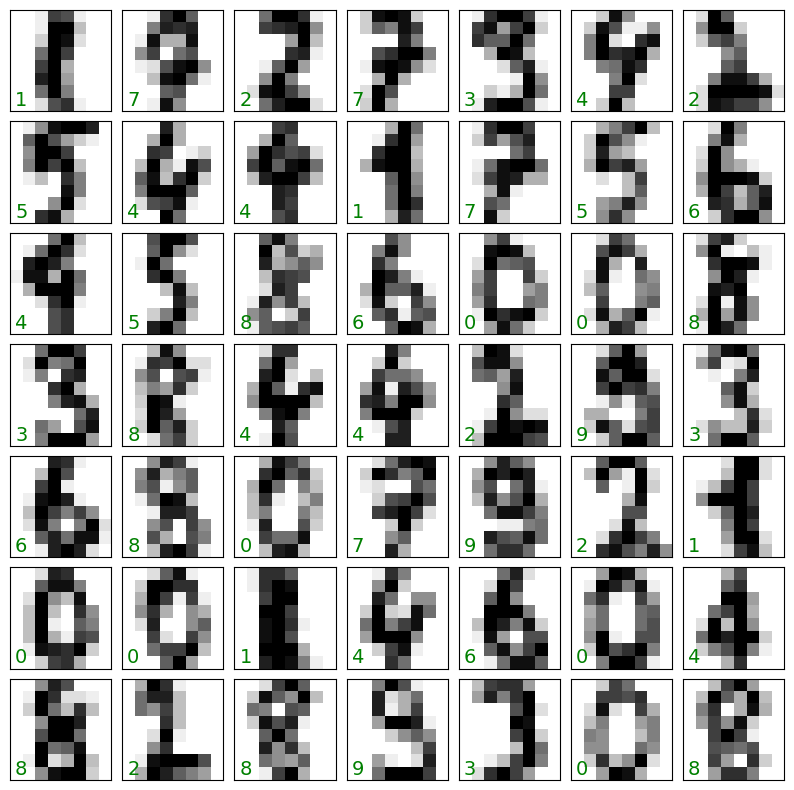

In [3]:
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(42)
mychoices = np.random.choice(digits.images.shape[0],100)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

## Dimensionality reduction

In [4]:
X = digits.data
isomap = Isomap(n_components=2)
X_transformed = isomap.fit_transform(X)

C:\Users\restu\anaconda3\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\restu\anaconda3\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


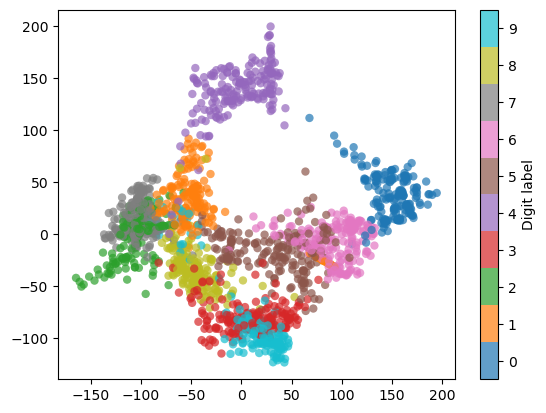

In [5]:
plt.scatter(X_transformed[:,0], X_transformed[:,1], c = digits.target, edgecolor='none', alpha=0.7, cmap='tab10');
plt.colorbar(label='Digit label', ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

## Classification with original data

In [6]:
y = digits.target
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [7]:
clf = LogisticRegression(solver = 'sag')
clf.fit(Xtrain, ytrain)

C:\Users\restu\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='sag')

In [8]:
result_train = clf.predict(Xtrain)
result_test = clf.predict(Xtest)
print(result_test)

[4 2 1 8 7 1 3 5 0 5 5 3 6 3 9 4 9 3 1 8 9 6 9 3 9 3 7 7 3 9 5 0 0 7 6 7 7
 6 1 5 2 9 0 4 1 3 3 4 9 5 5 0 7 3 5 7 3 1 1 8 1 9 3 0 9 9 7 2 6 0 9 2 5 2
 3 7 4 8 0 0 8 0 9 1 8 1 5 7 6 3 1 0 0 7 8 3 1 4 3 3 0 8 6 2 9 9 1 4 8 8 8
 1 6 5 5 2 4 0 5 6 6 8 5 5 4 1 3 4 0 5 6 8 5 6 5 3 3 7 4 5 4 1 4 6 1 3 2 8
 8 6 8 9 1 6 3 3 3 9 2 9 6 6 4 1 7 9 1 6 5 6 4 6 9 8 1 3 0 1 5 5 1 1 4 8 0
 9 3 8 5 7 4 9 7 0 7 2 8 8 8 8 7 1 6 7 2 3 2 8 7 6 8 5 6 8 5 4 9 0 9 0 2 9
 7 3 6 9 7 2 5 4 3 3 3 5 7 2 7 6 5 4 8 8 7 9 1 0 4 4 7 7 6 2 2 6 0 9 5 4 6
 4 1 9 5 5 8 1 2 0 3 3 5 4 1 7 0 2 0 3 6 4 1 8 1 0 3 4 8 1 0 9 5 5 7 4 1 7
 0 7 2 7 6 6 4 6 2 1 9 9 9 3 7 8 2 8 3 2 6 2 8 0 4 3 8 5 1 5 0 7 4 2 9 9 2
 9 6 0 4 7 4 0 9 6 2 3 0 7 3 2 9 9 0 4 1 8 6 8 8 8 1 4]


In [9]:
accuracy_train = accuracy_score(ytrain, result_train)
accuracy_test = accuracy_score(ytest, result_test)
print('Accuracy score for train data: ', accuracy_train)
print('Accuracy score for test data: ', accuracy_test)

Accuracy score for train data:  1.0
Accuracy score for test data:  0.9527777777777777


In [10]:
print('Confusion matrix for train data:')
print(confusion_matrix(ytrain, result_train))
print('\nConfusion matrix for test data:')
print(confusion_matrix(ytest, result_test))

Confusion matrix for train data:
[[144   0   0   0   0   0   0   0   0   0]
 [  0 147   0   0   0   0   0   0   0   0]
 [  0   0 149   0   0   0   0   0   0   0]
 [  0   0   0 142   0   0   0   0   0   0]
 [  0   0   0   0 147   0   0   0   0   0]
 [  0   0   0   0   0 145   0   0   0   0]
 [  0   0   0   0   0   0 144   0   0   0]
 [  0   0   0   0   0   0   0 143   0   0]
 [  0   0   0   0   0   0   0   0 135   0]
 [  0   0   0   0   0   0   0   0   0 141]]

Confusion matrix for test data:
[[34  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 28  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  1  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  1  0]
 [ 0  0  0  0  1 33  0  0  0  3]
 [ 0  0  0  0  0  1 36  0  0  0]
 [ 0  0  0  0  1  0  0 34  1  0]
 [ 0  3  0  0  0  0  0  1 35  0]
 [ 0  0  0  0  0  1  0  1  1 36]]


## magari commenta la confusion matriz

## Classification with transformed data

In [11]:
Xtrain_red, Xtest_red, ytrain_red, ytest_red = train_test_split(X_transformed, y, test_size=0.2)

In [12]:
clf.fit(Xtrain_red, ytrain_red)

C:\Users\restu\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='sag')

In [13]:
result_train_red = clf.predict(Xtrain_red)
result_test_red = clf.predict(Xtest_red)
print(result_test_red)

[0 3 0 0 0 3 2 8 4 0 3 6 6 4 2 3 0 5 7 2 1 3 2 8 7 2 8 3 7 6 9 1 6 7 1 2 6
 1 6 7 4 4 3 6 3 8 7 4 0 7 8 6 4 4 8 9 3 6 4 4 6 8 0 4 4 4 8 6 7 7 2 9 3 8
 2 7 2 7 0 3 2 4 5 2 8 2 1 1 4 1 3 8 6 8 2 5 0 9 6 2 7 8 7 8 6 6 4 2 0 6 4
 8 4 7 4 4 3 8 2 2 3 3 2 4 8 9 3 7 0 6 3 8 3 4 7 8 1 9 5 3 7 0 1 3 8 0 1 9
 3 3 7 3 3 5 2 7 2 2 7 6 0 4 3 3 4 7 7 7 8 7 2 1 3 8 6 7 4 6 1 7 7 3 8 2 3
 0 7 3 4 1 2 5 0 2 4 4 0 3 2 4 1 6 7 4 9 2 7 6 0 1 7 8 6 5 0 3 8 3 6 2 2 7
 0 2 1 9 3 2 8 3 1 9 3 0 6 7 2 6 6 7 7 2 0 3 0 8 0 5 0 6 7 5 8 5 7 2 1 1 2
 9 4 0 3 4 1 0 3 3 9 4 8 1 3 7 7 0 6 8 3 4 4 3 0 0 6 7 7 3 3 6 3 0 2 7 6 6
 7 7 1 0 6 6 8 7 6 4 5 8 5 8 6 1 2 6 2 2 5 8 6 3 3 6 8 3 3 4 0 9 2 8 4 9 3
 1 1 7 9 2 6 3 8 5 2 0 4 3 6 3 3 4 5 4 4 4 2 3 0 2 0 8]


In [14]:
accuracy_train_red = accuracy_score(ytrain_red, result_train_red)
accuracy_test_red = accuracy_score(ytest_red, result_test_red)
print('Accuracy score for train data: ', accuracy_train_red)
print('Accuracy score for test data: ', accuracy_test_red)

Accuracy score for train data:  0.6179540709812108
Accuracy score for test data:  0.6055555555555555


In [15]:
print('Confusion matrix for train data:')
print(confusion_matrix(ytrain_red, result_train_red))
print('\nConfusion matrix for test data:')
print(confusion_matrix(ytest_red, result_test_red))

Confusion matrix for train data:
[[143   0   0   0   1   0   5   0   0   0]
 [  0  68   4   0  15   0  24  31   1   0]
 [  0   1  77   0   0   0   0  60   4   0]
 [  0   0   0 101   0   3   0   0  14  27]
 [  0   3   1   0 139   0   0   1   0   0]
 [ 10   8   3  10   0  69  24   1  26   0]
 [ 32   2   0   0   0   2 103   0   1   0]
 [  0   4  64   0   0   0   0  70   1   0]
 [  0   1  17   4   0   0   0   1 113  10]
 [  0   1   5 107   0   0   0  15   5   5]]

Confusion matrix for test data:
[[27  0  0  0  0  0  2  0  0  0]
 [ 0 24  1  0  4  0  3  7  0  0]
 [ 0  1 18  0  0  0  0 12  4  0]
 [ 0  0  0 23  0  0  0  0  5 10]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 2  0  1  0  0 13  6  1  6  2]
 [ 8  0  0  0  0  2 31  0  0  0]
 [ 0  0 18  0  0  0  0 22  0  0]
 [ 0  0  1  0  1  0  0  0 23  3]
 [ 0  0  5 33  0  0  0  4  0  0]]
